In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
data=pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.shape

(400, 5)

In [4]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
print(data['Gender'].unique())

['Male' 'Female']


In [7]:
print(data['Purchased'].unique())

[0 1]


In [8]:
data.drop(['User ID'],axis=1,inplace=True)

In [9]:
print(data.head())

   Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0


In [10]:
print(data['Gender'].value_counts())

Gender
Female    204
Male      196
Name: count, dtype: int64


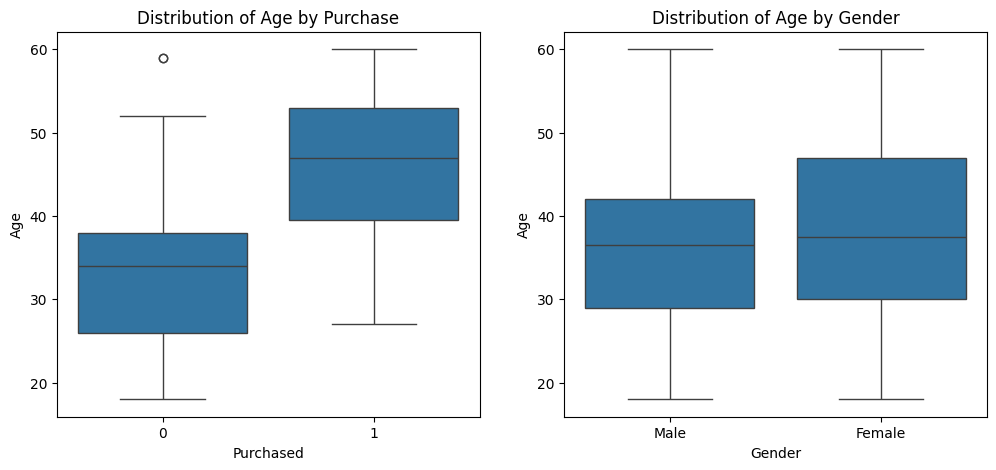

In [11]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.boxplot(x='Purchased',y='Age',data=data,ax=axes[0])
axes[0].set_xlabel('Purchased')
axes[0].set_ylabel('Age')
axes[0].set_title('Distribution of Age by Purchase')

sns.boxplot(x='Gender',y='Age',data=data,ax=axes[1])
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Age')
axes[1].set_title('Distribution of Age by Gender')
plt.show()

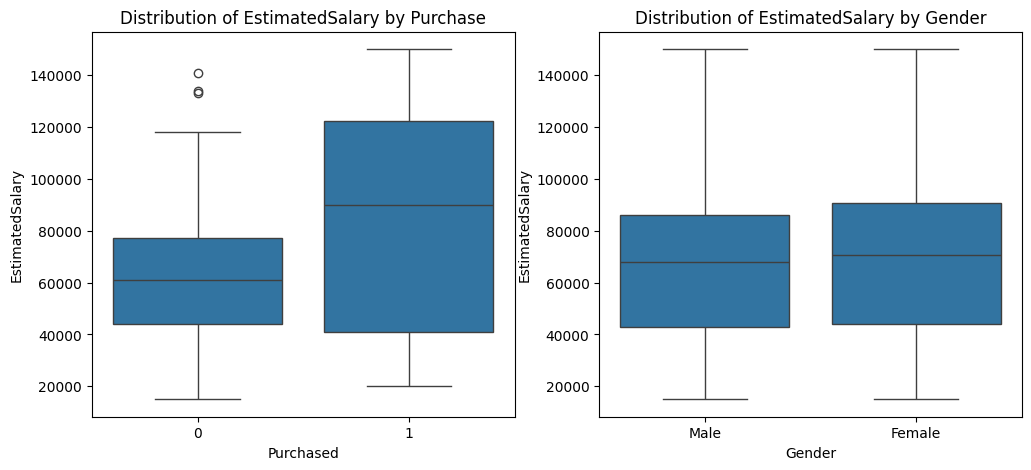

In [12]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.boxplot(x='Purchased',y='EstimatedSalary',data=data,ax=axes[0])
axes[0].set_xlabel('Purchased')
axes[0].set_ylabel('EstimatedSalary')
axes[0].set_title('Distribution of EstimatedSalary by Purchase')

sns.boxplot(x='Gender',y='EstimatedSalary',data=data,ax=axes[1])
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('EstimatedSalary')
axes[1].set_title('Distribution of EstimatedSalary by Gender')
plt.show()

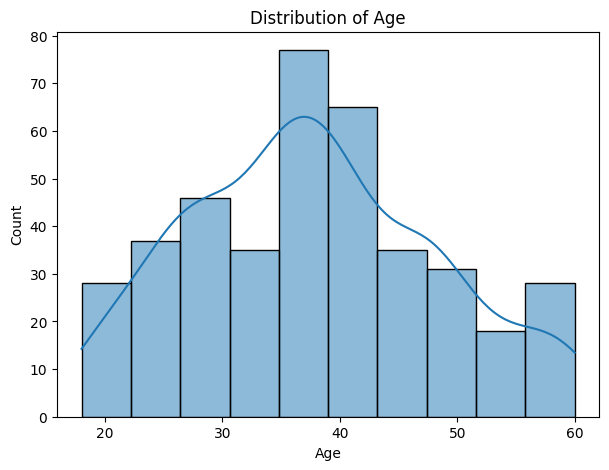

In [13]:
fig, ax = plt.subplots(figsize=(7,5))
sns.histplot(data=data, x="Age", bins=10, kde=True, ax=ax)
ax.set_title("Distribution of Age")
plt.show()

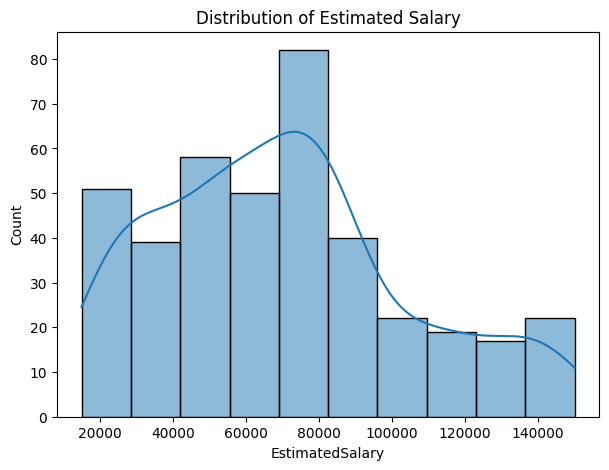

In [14]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.histplot(data=data, x="EstimatedSalary", bins=10, kde=True, ax=ax)
ax.set_title("Distribution of Estimated Salary")
plt.show()

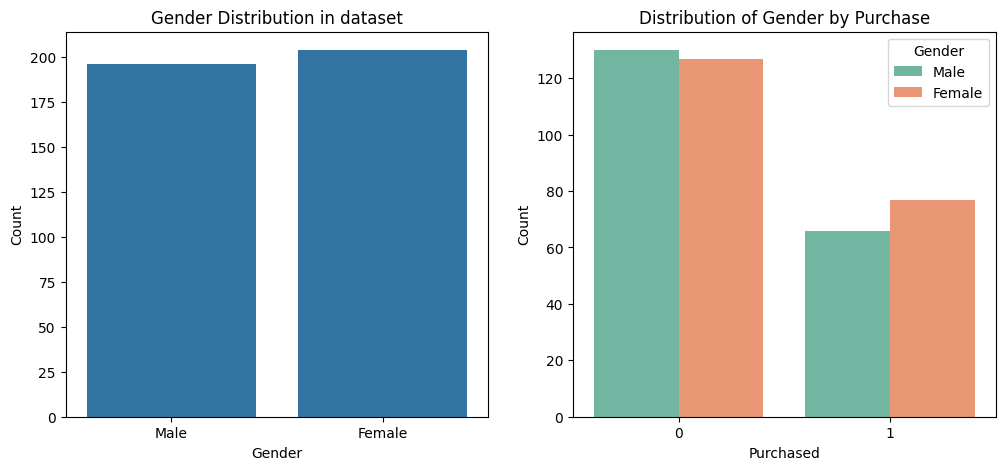

In [15]:
fig, axes = plt.subplots(1,2,figsize=(12,5))

sns.countplot(x='Gender', data=data, ax=axes[0])
axes[0].set_title('Gender Distribution in dataset')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')


sns.countplot(data=data, x='Purchased', hue='Gender',ax=axes[1], palette='Set2')
axes[1].set_xlabel('Purchased')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Gender by Purchase')
plt.show()

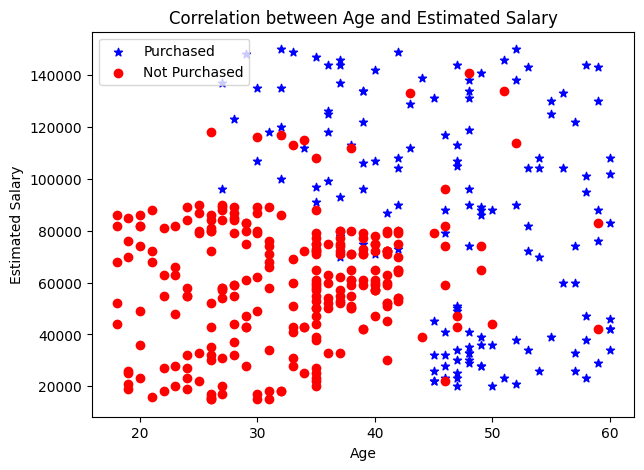

In [16]:
plt.figure(figsize=(7,5))
not_purchased = data[data['Purchased']==0]
purchased = data[data['Purchased']==1]
# Scatter plot 1
plt.scatter(purchased['Age'], purchased['EstimatedSalary'], c='blue', marker='*', label='Purchased')
# Scatter plot 2
plt.scatter(not_purchased['Age'], not_purchased['EstimatedSalary'], c='red', marker='o', label='Not Purchased')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Correlation between Age and Estimated Salary')
plt.legend()
plt.show()

In [17]:
ohe=OneHotEncoder(sparse_output=False,drop='first')
male=pd.DataFrame(ohe.fit_transform(data[['Gender']]),columns=['Male'])
print(male.head())

   Male
0   1.0
1   1.0
2   0.0
3   0.0
4   1.0


In [18]:
data['Gender_male']=male
data.drop(['Gender'],axis=1,inplace=True)
print(data.head())


   Age  EstimatedSalary  Purchased  Gender_male
0   19            19000          0          1.0
1   35            20000          0          1.0
2   26            43000          0          0.0
3   27            57000          0          0.0
4   19            76000          0          1.0


In [19]:
X=data.drop(['Purchased'],axis=1)
print(X.head())

   Age  EstimatedSalary  Gender_male
0   19            19000          1.0
1   35            20000          1.0
2   26            43000          0.0
3   27            57000          0.0
4   19            76000          1.0


In [20]:
Y=data['Purchased']
Y


0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.2, stratify=Y)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled[0:5]


array([[-1.33732861, -1.27939578, -0.98142253],
       [-1.53372382, -0.20827373, -0.98142253],
       [-1.82831663, -1.45791612, -0.98142253],
       [ 2.09958751,  2.17199748,  1.01892912],
       [-0.64994539,  0.56531441, -0.98142253]])

In [23]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [24]:

model2=SVC()
model=RandomForestClassifier()

model.fit(X_train_scaled,Y_train)
model2.fit(X_train_scaled,Y_train)

SVC()

In [25]:

Y_pred2=model2.predict(X_test_scaled)
Y_pred=model.predict(X_test_scaled) 

In [26]:
print(classification_report(Y_test,Y_pred))#For RandomForest Classifier

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        51
           1       0.87      0.90      0.88        29

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



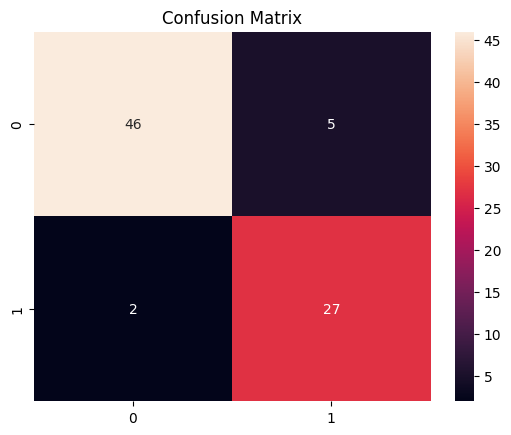

In [27]:
cm = confusion_matrix(Y_test,Y_pred2)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.show()

In [28]:
print(classification_report(Y_test,Y_pred2))#for SVC

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        51
           1       0.84      0.93      0.89        29

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



In [29]:
with open('model.pkl','wb') as f:
    pickle.dump(model2,f)

In [30]:
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)